In [1]:
import os
from mpl_toolkits.basemap import Basemap
# Tutorials:
# http://liyangbit.com/pythonvisualization/basemap-install/
# https://github.com/python-visualization/folium/issues/35

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv, time
import matplotlib.pyplot as plt
import warnings, os
%matplotlib inline
import folium
from selenium import webdriver
emission = pd.read_csv('result002.csv')    
emission.head()

,Index,1990Emissions,1991Emissions,1992Emissions,1993Emissions,1994Emissions,1995Emissions,1996Emissions,1997Emissions,1998Emissions,...,2011Emissions,2012Emissions,2013Emissions,2014Emissions,iso_code3,gwp,location,gas,source,sector
0,0,168.260890,161.379479,147.865361,138.883558,127.853557,119.924399,109.830821,103.021864,95.787242,...,89.642317,91.053215,77.959559,83.017872,PRK,AR2,North Korea,All GHG,CAIT,Total including LUCF
1,1,256.271832,280.939528,306.086410,334.844474,361.205803,393.505672,422.060464,446.144321,381.872646,...,630.916176,635.144018,633.943161,631.600880,KOR,AR2,South Korea,All GHG,CAIT,Total including LUCF
2,2,78.347714,91.585371,85.856993,99.057113,110.628858,117.781736,117.588646,119.368615,125.933020,...,192.314503,197.427304,196.138587,198.954586,KWT,AR2,Kuwait,All GHG,CAIT,Total including LUCF
3,3,29.754092,26.764942,18.899753,14.478952,10.066687,6.985898,7.929541,7.700235,8.083685,...,12.410378,14.992463,14.701992,14.352477,KGZ,AR2,Kyrgyzstan,All GHG,CAIT,Total including LUCF
4,4,16.687300,16.642648,16.928394,16.954145,17.289623,17.413120,17.682800,17.526259,19.152552,...,26.786013,29.277527,29.360693,29.618038,LAO,AR2,Laos,All GHG,CAIT,Total including LUCF


In [3]:
for i in emission:
    emission[i].fillna(0, inplace = True)

In [4]:
import pandas as pd
import time

dataset = emission

t = 'world-countries.json'
m = folium.Map(location=[100,0],zoom_start=1)
folium.Choropleth(geo_data=t,
              name='choropleth',
              data=dataset,
              columns=['iso_code3','2013Emissions'],
              key_on='feature.id',
              fill_color='OrRd',
              fill_opacity=0.7,
              line_opacity=0.2,
              legend_name='Green house gas emission in 1990'
              ).add_to(m)
m

In [6]:
delay=5
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Chrome()   # here you can change the browser
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')

True

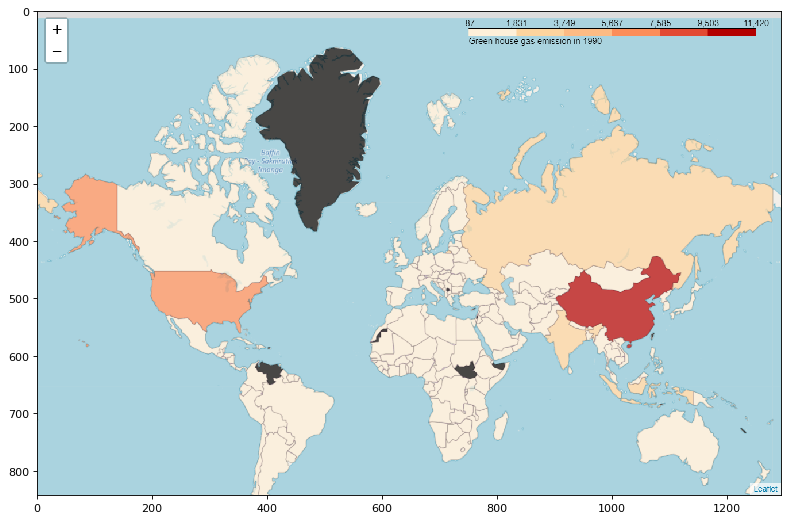

In [7]:
# To show what the result looks like, I'll show below:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
img = mpimg.imread('map.png')
plt.imshow(img)
plt.show()

In [8]:
from folium.plugins import TimeSliderChoropleth
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

emission['iso_a3']=emission['iso_code3']
temp = pd.merge(emission, gdf, on=['iso_a3'])

temp.head()

,Index,1990Emissions,1991Emissions,1992Emissions,1993Emissions,1994Emissions,1995Emissions,1996Emissions,1997Emissions,1998Emissions,...,location,gas,source,sector,iso_a3,pop_est,continent,name,gdp_md_est,geometry
0,0,168.260890,161.379479,147.865361,138.883558,127.853557,119.924399,109.830821,103.021864,95.787242,...,North Korea,All GHG,CAIT,Total including LUCF,PRK,22665345.0,Asia,Dem. Rep. Korea,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,..."
1,1,256.271832,280.939528,306.086410,334.844474,361.205803,393.505672,422.060464,446.144321,381.872646,...,South Korea,All GHG,CAIT,Total including LUCF,KOR,48508972.0,Asia,Korea,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,..."
2,2,78.347714,91.585371,85.856993,99.057113,110.628858,117.781736,117.588646,119.368615,125.933020,...,Kuwait,All GHG,CAIT,Total including LUCF,KWT,2691158.0,Asia,Kuwait,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4..."
3,3,29.754092,26.764942,18.899753,14.478952,10.066687,6.985898,7.929541,7.700235,8.083685,...,Kyrgyzstan,All GHG,CAIT,Total including LUCF,KGZ,5431747.0,Asia,Kyrgyzstan,11610.0,"POLYGON ((70.96231489449914 42.26615428320549,..."
4,4,16.687300,16.642648,16.928394,16.954145,17.289623,17.413120,17.682800,17.526259,19.152552,...,Laos,All GHG,CAIT,Total including LUCF,LAO,6834942.0,Asia,Lao PDR,13980.0,"POLYGON ((105.2187768900789 14.27321177821069,..."


In [9]:
n_periods, n_sample = 25, 0

assert n_sample < n_periods

datetime_index = pd.date_range('1990', periods=n_periods, freq='Y')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

Index(['662601600', '694137600', '725760000', '757296000', '788832000',
       '820368000', '851990400', '883526400', '915062400', '946598400',
       '978220800', '1009756800', '1041292800', '1072828800', '1104451200',
       '1135987200', '1167523200', '1199059200', '1230681600', '1262217600',
       '1293753600', '1325289600', '1356912000', '1388448000', '1419984000'],
      dtype='object')

In [10]:
import numpy as np

styledata = {}

for country in temp.index:
    df = pd.DataFrame(
        {'color': np.transpose(temp.iloc[country,[_ for _ in range(1,26)]].tolist()),
         'opacity': np.transpose(temp.iloc[country,[_ for _ in range(1,26)]].tolist())},
        index=dt_index
    )
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

In [11]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [12]:
from branca.colormap import linear

cmap = linear.PuRd_09.scale(min_color, max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

In [13]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

In [14]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [15]:
temp.head()

,Index,1990Emissions,1991Emissions,1992Emissions,1993Emissions,1994Emissions,1995Emissions,1996Emissions,1997Emissions,1998Emissions,...,location,gas,source,sector,iso_a3,pop_est,continent,name,gdp_md_est,geometry
0,0,168.260890,161.379479,147.865361,138.883558,127.853557,119.924399,109.830821,103.021864,95.787242,...,North Korea,All GHG,CAIT,Total including LUCF,PRK,22665345.0,Asia,Dem. Rep. Korea,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,..."
1,1,256.271832,280.939528,306.086410,334.844474,361.205803,393.505672,422.060464,446.144321,381.872646,...,South Korea,All GHG,CAIT,Total including LUCF,KOR,48508972.0,Asia,Korea,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,..."
2,2,78.347714,91.585371,85.856993,99.057113,110.628858,117.781736,117.588646,119.368615,125.933020,...,Kuwait,All GHG,CAIT,Total including LUCF,KWT,2691158.0,Asia,Kuwait,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4..."
3,3,29.754092,26.764942,18.899753,14.478952,10.066687,6.985898,7.929541,7.700235,8.083685,...,Kyrgyzstan,All GHG,CAIT,Total including LUCF,KGZ,5431747.0,Asia,Kyrgyzstan,11610.0,"POLYGON ((70.96231489449914 42.26615428320549,..."
4,4,16.687300,16.642648,16.928394,16.954145,17.289623,17.413120,17.682800,17.526259,19.152552,...,Laos,All GHG,CAIT,Total including LUCF,LAO,6834942.0,Asia,Lao PDR,13980.0,"POLYGON ((105.2187768900789 14.27321177821069,..."


In [16]:
from folium.plugins import TimeSliderChoropleth
from geopandas import GeoDataFrame

m1 = folium.Map(tiles='OpenStreetMap',control_scale=True)
g = TimeSliderChoropleth(
    GeoDataFrame(temp).to_json(),
    styledict=styledict,
).add_to(m1)

m1

In [17]:
delay=5
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m1.save(fn)

browser = webdriver.Chrome()   # here you can change the browser
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map1.png')

True

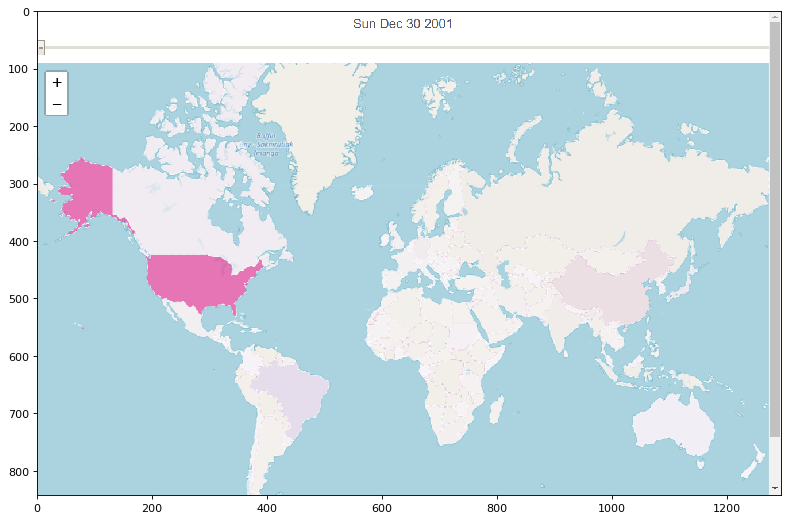

In [18]:
# To show what the result looks like, I'll show below:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
img = mpimg.imread('map1.png')
plt.imshow(img)
plt.show()